# Supervised Learning (Linear Regression)

We moeten een lineair regressiemodel maken en trainen om te voorspellen hoeveel Great Outdoors gaat verkopen.

Om dit te doen, moeten we de eerst bepalen welke data we gaan gebruiken als features en een target. Great Outdoors heeft 3 SQLite tabellen:
1. Sales
2. CRM
3. Staff

In de Sales tabel staan order headers, elk met 1 or meerdere order details. Een order detail betreft 1 product die verkocht wordt bij een order, met een aantal en prijs. Dit aantal kunnen we gebruiken als target.

Relevante features kunnen zijn:
- order_details.product_number
- order_details.unit_sale_price
- order_header.order_date
- order_header.sales_branch_code
- order_header.sales_staff_code
- order_header.order_method_code

In [18]:
# Imports
import pandas as pd
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [19]:
# Load Dataset
sales_conn = sqlite3.connect("../data/go_sales_volledig.sqlite")

orders = pd.read_sql_query(
    "SELECT * FROM order_header oh LEFT JOIN order_details od ON od.ORDER_NUMBER = oh.ORDER_NUMBER ",
    sales_conn,
)
orders.dtypes

ORDER_NUMBER               int64
RETAILER_NAME             object
RETAILER_SITE_CODE         int64
RETAILER_CONTACT_CODE      int64
SALES_STAFF_CODE           int64
SALES_BRANCH_CODE          int64
ORDER_DATE                object
ORDER_METHOD_CODE          int64
ORDER_DETAIL_CODE          int64
ORDER_NUMBER               int64
PRODUCT_NUMBER             int64
QUANTITY                   int64
UNIT_COST                float64
UNIT_PRICE               float64
UNIT_SALE_PRICE          float64
dtype: object

In [20]:
# Data Preprocessing

orders = orders.loc[:, ~orders.columns.duplicated()]

orders["ORDER_DATE"] = pd.to_datetime(orders["ORDER_DATE"])
orders["ORDER_YEAR"] = orders["ORDER_DATE"].dt.year
orders["ORDER_MONTH"] = orders["ORDER_DATE"].dt.month

orders = orders.drop(
    columns=[
        "ORDER_DATE",
        "RETAILER_NAME",
        "UNIT_COST",
        "UNIT_PRICE",
        "ORDER_DETAIL_CODE",
    ]
)

orders.dtypes

ORDER_NUMBER               int64
RETAILER_SITE_CODE         int64
RETAILER_CONTACT_CODE      int64
SALES_STAFF_CODE           int64
SALES_BRANCH_CODE          int64
ORDER_METHOD_CODE          int64
PRODUCT_NUMBER             int64
QUANTITY                   int64
UNIT_SALE_PRICE          float64
ORDER_YEAR                 int32
ORDER_MONTH                int32
dtype: object

In [21]:
# Dummy Encoding
orders_encoded = pd.get_dummies(
    orders,
    columns=[
        "PRODUCT_NUMBER",
        "SALES_BRANCH_CODE",
        "SALES_STAFF_CODE",
        "ORDER_METHOD_CODE",
        "RETAILER_SITE_CODE",
        "RETAILER_CONTACT_CODE",
    ],
    drop_first=True,
)

orders_encoded.dtypes

ORDER_NUMBER                   int64
QUANTITY                       int64
UNIT_SALE_PRICE              float64
ORDER_YEAR                     int32
ORDER_MONTH                    int32
                              ...   
RETAILER_CONTACT_CODE_458       bool
RETAILER_CONTACT_CODE_459       bool
RETAILER_CONTACT_CODE_460       bool
RETAILER_CONTACT_CODE_461       bool
RETAILER_CONTACT_CODE_462       bool
Length: 1008, dtype: object

In [22]:
# Split Data
X = orders_encoded.drop(columns=["QUANTITY"])
y = orders_encoded["QUANTITY"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [23]:
# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


RMSE: 45.17094134632861
R2 Score: 0.46815969387308476


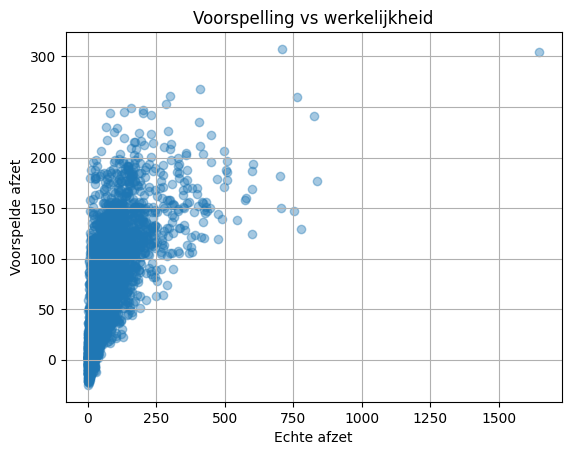

In [28]:
# Evaluate Model
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = model.score(X_test, y_test)

print("RMSE:", rmse)
print("R2 Score:", r2)

plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Echte afzet")
plt.ylabel("Voorspelde afzet")
plt.title("Voorspelling vs werkelijkheid")
plt.grid(True)
plt.show()